# Project 3: Web APIs & Classification

## Executive Summary

### Contents:
- [1. Importing the Libraries](#1.-Importing-the-Libraries)
- [2. Importing Datasets](#2.-Importing-Datasets)
- [3. Inspection of Datasets](#3.-Inspection-of-Datasets)
- [4. Data Cleaning](#4.-Data-Cleaning)
- [5. Pre-processing](#5.-Pre-processing)
- [6. Exploratory Data Analysis (EDA)](#6.-Exploratory-Data-Analysis-(EDA))
- [7. Create Feature Matrix and Target](#7.-Create-Feature-Matrix-and-Target)
- [8. Model Selection](#8.-Model-Selection)
- [9. Selected Model and Business Recommendations](#9.-Selected-Model-and-Business-Recommendations)
- [10. Future Steps](#10.-Future-Steps)

## Problem Statement 

- International Basketball Federation (FIBA) is an association of national organizations which governs the sport of basketball worldwide. In recent years, the number of basketball fans worldwide had dwindled and many former basketball fans had switched to soccer. FIBA wants to identify the key words that can best capture the attention of its'fans so as to differentiate itself from soccer. This would facilitate FIBA's marketing effort on social medial to create short but impactful phrases. FIBA had approached reddit data science department for this project.     

- Therefore, the goal of the project is to discover the key words that best differentiate basketball fans from soccer fans in reddit posts.

- Three classification models, Naive Bayes, Logistic Regression and K-Nearest Neighbors will be developed. 

- The success of the model will be assessed based on its mean accuracy, precision and recall on unseen data. 

- There are 69.6K Basketball fans and 2.3 million soccer fans respectively on reddit. These fans come from all over the world. The models that will be developed are capable of accurately classify the two subreddits. There are enough unique posts in each subreddit to identify key words to achieve our research goal. Therefore, the scope of the project is appropriate. 

- This project is important to FIBA to reduce customer(fans) churn and to win back former fans. Otherwise, basketball fans worldwide will continue to dwindle. This has negatively affect major basketball leagues. Their ticket sales, membership and merchandise had experienced drastic drop. FIBA funding will be affected if fans continue to leave. 

- The primary stakeholder is FIBA. FIBA can use the key words identified to develop a successful marketing campaign to increase fan base. The secondary stakeholder will be major basketball associations for example NBA and the teams in it. They would benefit in terms of ticket sales, membership sign up, pay per view and merchandise sales. 

## 1. Importing the Libraries

In [1]:
# Maths
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Visual
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,accuracy_score, classification_report
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler

# NLP
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string

# Others
import time
import datetime as dt
import re
import os

## 2. Importing Datasets

In [2]:
path ='../Project 3/datasets/'
df = pd.read_csv(path + 'combine.csv')

## 3. Inspection of Datasets

In [3]:
df.head()

,title,selftext,upvote_ratio,ups,score,num_comments,subreddit
0,RULE REMINDER: You cannot Post Offers to Trade...,Admins have banned other subs for this.\n\nNo ...,0.87,33,33,13,Basketball
1,r/Basketball Weekly Discussion: Basketball Sho...,#Welcome to /r/Basketball's weekly Shoe Discus...,1.00,2,2,0,Basketball
2,New Video: How Jimmy Butler Manages to be Both...,NaN,0.97,107,107,11,Basketball
3,LIKE MIKE - COVErgeist ft BIG 6 - lyric video ...,NaN,0.40,0,0,0,Basketball
4,Is it unusual that after i gained 50lbs in 5 m...,"The change in my athleticism has been insane, ...",0.97,98,98,63,Basketball


In [4]:
df.tail()

,title,selftext,upvote_ratio,ups,score,num_comments,subreddit
1801,Aston Villa forward Keinan Davis has signed a ...,NaN,0.79,31,31,25,soccer
1802,[Romano] Last updates... After personal terms ...,NaN,1.00,3,3,0,soccer
1803,[L’Equipe via GFFN] Leicester City are expecte...,NaN,1.00,1,1,0,soccer
1804,"Rakitić: ""First of all, congratulations to Bay...",NaN,1.00,5,5,3,soccer
1805,[Official] Fenerbahçe purchase Mbwana Samatta ...,NaN,1.00,1,1,0,soccer


In [5]:
df.dtypes

title            object
selftext         object
upvote_ratio    float64
ups               int64
score             int64
num_comments      int64
subreddit        object
dtype: object

### Comment
Subreddit should be encoded to 0 or 1 for analysis 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1806 non-null   object 
 1   selftext      966 non-null    object 
 2   upvote_ratio  1806 non-null   float64
 3   ups           1806 non-null   int64  
 4   score         1806 non-null   int64  
 5   num_comments  1806 non-null   int64  
 6   subreddit     1806 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 98.9+ KB


In [7]:
df.isnull().sum()

title             0
selftext        840
upvote_ratio      0
ups               0
score             0
num_comments      0
subreddit         0
dtype: int64

### Comment
There are 840 null cells in selftext which needs to be addressed

In [8]:
df.describe(include='all')

,title,selftext,upvote_ratio,ups,score,num_comments,subreddit
count,1806,966,1806.000000,1806.000000,1806.000000,1806.000000,1806
unique,1799,950,NaN,NaN,NaN,NaN,2
top,Dunking,#Welcome to /r/Basketball's weekly Shoe Discus...,NaN,NaN,NaN,NaN,Basketball
freq,3,10,NaN,NaN,NaN,NaN,995
mean,NaN,NaN,0.891035,240.142303,240.142303,41.167774,NaN
std,NaN,NaN,0.134164,1119.129315,1119.129315,164.800829,NaN
min,NaN,NaN,0.250000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.820000,1.000000,1.000000,2.000000,NaN
50%,NaN,NaN,0.940000,7.000000,7.000000,6.000000,NaN
75%,NaN,NaN,1.000000,55.000000,55.000000,22.000000,NaN


### Comment
There seems to be some duplicates in title and selftext as the the count and unique does not match. 
I shall investigate. 

In [9]:
# Investigating title. the two soccer post seems to be duplicate
df[df.duplicated(subset='title')]

,title,selftext,upvote_ratio,ups,score,num_comments,subreddit
148,Traveling calls international games,Do NBA players get called for traveling often ...,1.00,1,1,0,Basketball
315,Dunking,I am at age of 18 and i have performed some ex...,1.00,2,2,0,Basketball
514,Vertical jump training improvement,Hello guys I am 15 years old and have roughly ...,0.76,2,2,3,Basketball
560,Dunking,"I got supposedly my first dunk, I didn’t think...",0.98,77,77,30,Basketball
659,Possible to make varsity team as a senior?,Hi I’ve always been really interested in baske...,1.00,1,1,0,Basketball
1316,Daily Discussion,This thread is for general football discussion...,0.90,104,104,3726,soccer
1611,Daily Discussion,This thread is for general football discussion...,0.90,99,99,3195,soccer


In [10]:
# Investigate selftext. Many null rows, i will inspect those that are not null. 
df[(df.duplicated(subset='selftext')) & (df['selftext'].isnull()==False)]

,title,selftext,upvote_ratio,ups,score,num_comments,subreddit
96,r/Basketball Weekly Discussion: Basketball Sho...,#Welcome to /r/Basketball's weekly Shoe Discus...,0.88,6,6,8,Basketball
171,r/Basketball Weekly Discussion: Basketball Sho...,#Welcome to /r/Basketball's weekly Shoe Discus...,1.00,38,38,47,Basketball
274,r/Basketball Weekly Discussion: Basketball Sho...,#Welcome to /r/Basketball's weekly Shoe Discus...,1.00,5,5,16,Basketball
391,r/Basketball Weekly Discussion: Basketball Sho...,#Welcome to /r/Basketball's weekly Shoe Discus...,0.86,5,5,12,Basketball
511,r/Basketball Weekly Discussion: Basketball Sho...,#Welcome to /r/Basketball's weekly Shoe Discus...,0.76,2,2,16,Basketball
620,r/Basketball Weekly Discussion: Basketball Sho...,#Welcome to /r/Basketball's weekly Shoe Discus...,0.95,32,32,42,Basketball
743,r/Basketball Weekly Discussion: Basketball Sho...,#Welcome to /r/Basketball's weekly Shoe Discus...,1.00,5,5,5,Basketball
846,r/Basketball Weekly Discussion: Basketball Sho...,#Welcome to /r/Basketball's weekly Shoe Discus...,0.96,43,43,44,Basketball
856,Between the legs,I’m new to basketball and I practices between ...,1.00,3,3,4,Basketball
909,Workout or exercises that can increase my vert...,Thank you in advance,1.00,4,4,5,Basketball


In [11]:
# Dropping duplicated rows
# Row 56, 856, 909, 1050, 1475, 1763 will be kept as they are not duplicates
# Row 96 and 1316 will be kept as reference 
df.drop([171,274,391,511,620,743,846,971,1611], axis=0, inplace=True)

In [12]:
# Lets take a look again at describe
df.describe(include='all')

,title,selftext,upvote_ratio,ups,score,num_comments,subreddit
count,1797,957,1797.000000,1797.000000,1797.000000,1797.000000,1797
unique,1791,950,NaN,NaN,NaN,NaN,2
top,Dunking,Thank you in advance,NaN,NaN,NaN,NaN,Basketball
freq,3,2,NaN,NaN,NaN,NaN,987
mean,NaN,NaN,0.890913,241.215915,241.215915,39.486923,NaN
std,NaN,NaN,0.134358,1121.824682,1121.824682,147.485643,NaN
min,NaN,NaN,0.250000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.820000,1.000000,1.000000,2.000000,NaN
50%,NaN,NaN,0.940000,7.000000,7.000000,6.000000,NaN
75%,NaN,NaN,1.000000,55.000000,55.000000,22.000000,NaN


### Comment
- All duplicates removed. Based on the summary statistics, there 1797 titles and 957 selftext. 
- The mean upvote ratio is 0.89, meaning out of 10 votes, there are around 9 votes in support. It has a low standards deviation of 0.134 meaning that the data is close together, not spread out. 
- The mean number of ups is 241 per post. Standard deviation of 1121.8, meaning the data is widely spread out. Looking at the min=0 and max=21286, this indicates that there is high variance. 
- The score follows the distribution of the ups as socre is only the difference between ups and down votes. 
- The average number of comment is 39 per post with standards deviation of 147.5. This means that there is high variance, looking at the min=0 and max=3726, 25%=2 and 75%=22, this proves that the data points are widely spread out. 


In [13]:
df.shape

(1797, 7)

In [14]:
# Total 987 unique basketball posts and 810 unique soccer posts
df['subreddit'].value_counts()

Basketball    987
soccer        810
Name: subreddit, dtype: int64

## 4. Data Cleaning

In [15]:
pd.set_option('display.max_rows', None)

In [16]:
# Addressing null cells 
df.fillna("",inplace=True)
df.isnull().sum()

title           0
selftext        0
upvote_ratio    0
ups             0
score           0
num_comments    0
subreddit       0
dtype: int64

In [17]:
# I have seen some emojis in the title and selftext, it needs to be removed
def strip_emoji(text):
    RE_EMOJI = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    return RE_EMOJI.sub(r'', text)

In [18]:
def cleaner(text):
    # Make lowercase
    text = text.lower()
    
    # Remove non-letters
    text = re.sub("[^a-zA-Z]", " ", text)

    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    
    # Remove punctuation and split 's, 't, 've with a space for filter
    text = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', text)
    
    # Remove words with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+', ' ', text)
    
    # Remove emoji
    text = strip_emoji(text)
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text = ''.join(c for c in text if c <= '\uFFFF') 
    
    return text

In [19]:
# Lets take alook at title before we clean 
df['title'].head()

0    RULE REMINDER: You cannot Post Offers to Trade...
1    r/Basketball Weekly Discussion: Basketball Sho...
2    New Video: How Jimmy Butler Manages to be Both...
3    LIKE MIKE - COVErgeist ft BIG 6 - lyric video ...
4    Is it unusual that after i gained 50lbs in 5 m...
Name: title, dtype: object

In [20]:
# Apply cleaner function
df['title'] = df['title'].apply(cleaner)

In [21]:
# Lets check title after cleaning 
df['title'].head()

0    rule reminder you cannot post offers trade sel...
1     basketball weekly discussion basketball shoes...
2    new video how jimmy butler manages both the mo...
3    like mike covergeist big lyric video with high...
4     unusual that after gained lbs months somehow ...
Name: title, dtype: object

In [22]:
# Lets take alook at selftext before cleaning 
df['selftext'].head()

0    Admins have banned other subs for this.\n\nNo ...
1    #Welcome to /r/Basketball's weekly Shoe Discus...
2                                                     
3                                                     
4    The change in my athleticism has been insane, ...
Name: selftext, dtype: object

In [23]:
# Apply cleaner function to selftext
df['selftext'] = df['selftext'].astype(str)
df['selftext'] = df['selftext'].apply(cleaner)

In [24]:
# Take alook at selftext after cleaning
df['selftext'].head()

0    admins have banned other subs for this asking ...
1     welcome basketball weekly shoe discussion thr...
2                                                     
3                                                     
4    the change athleticism has been insane can run...
Name: selftext, dtype: object

## 5. Pre-processing

In [25]:
# To address the issue of too many null cells in selftext, I will combine title and selftext as a new column
df['text'] = df['title'] + " " + df['selftext']

In [26]:
# I will keep text, upvote_ratio, ups, score, num_comments and subreddit for analysis 
df = df[['text', 'upvote_ratio','ups','score','num_comments','subreddit']]

In [27]:
# Lets take a look at our new df
df.head()

,text,upvote_ratio,ups,score,num_comments,subreddit
0,rule reminder you cannot post offers trade sel...,0.87,33,33,13,Basketball
1,basketball weekly discussion basketball shoes...,1.00,2,2,0,Basketball
2,new video how jimmy butler manages both the mo...,0.97,107,107,11,Basketball
3,like mike covergeist big lyric video with high...,0.40,0,0,0,Basketball
4,unusual that after gained lbs months somehow ...,0.97,98,98,63,Basketball


In [28]:
df.shape

(1797, 6)

In [29]:
# I have chosen to use lemmatizer over porter stemmer because 
# Lemmatization, takes into consideration the morphological analysis of the words.
lemmatizer = WordNetLemmatizer()

In [30]:
def lemmatize_words(text):
    words = text.split()
    lemma_words = ''
    for word in words:
        lemma_words += (lemmatizer.lemmatize(word) + ' ')
    return lemma_words

In [31]:
df['text'] = df['text'].apply(lemmatize_words)

In [32]:
# Take alook at the lemmatized text
df['text'][0]

'rule reminder you cannot post offer trade sell copyright material this includes vertshock and similar program admins have banned other sub for this asking for posting code for program like vert shock asking for posting illegal stream for game you will banned will not allow the entire sub closed for few bad apple this your warning '

In [33]:
# Changing subreddit to int 1 and 0
df['subreddit'] = df['subreddit'].map({'Basketball': 1, 'soccer': 0})

In [34]:
df.head()

,text,upvote_ratio,ups,score,num_comments,subreddit
0,rule reminder you cannot post offer trade sell...,0.87,33,33,13,1
1,basketball weekly discussion basketball shoe s...,1.00,2,2,0,1
2,new video how jimmy butler manages both the mo...,0.97,107,107,11,1
3,like mike covergeist big lyric video with high...,0.40,0,0,0,1
4,unusual that after gained lb month somehow bec...,0.97,98,98,63,1


In [35]:
# Create a new column call text length
df['text length'] = df['text'].apply(len)

In [36]:
# Export the cleaned df dataset
export_path ='../Project 3/datasets/combine_cleaned.csv'
df.to_csv(export_path, index=False)

## 6. Exploratory Data Analysis (EDA)

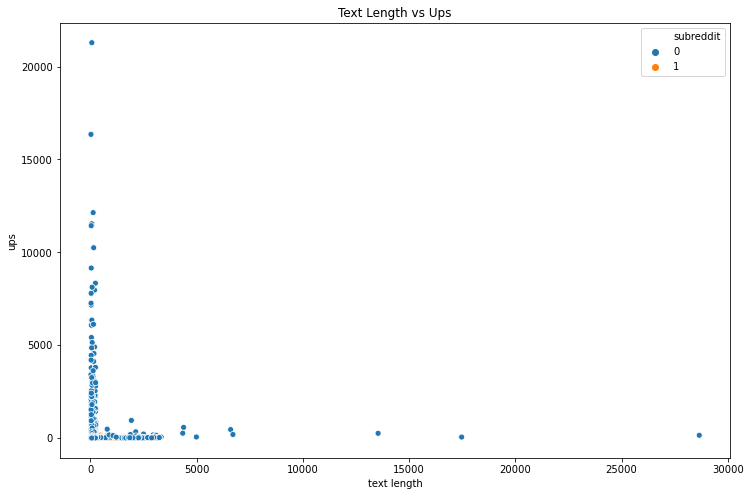

In [37]:
# Lets take alook at text length to ups
# There seems to be three outliers, lets investigate further
plt.figure(figsize=(12,8))
plt.title('Text Length vs Ups')
sns.scatterplot(x='text length',y='ups',data=df, hue='subreddit')

### Comment
- Seems like shorter text length gets more ups
- The data is not normally distributed and it is right skewed

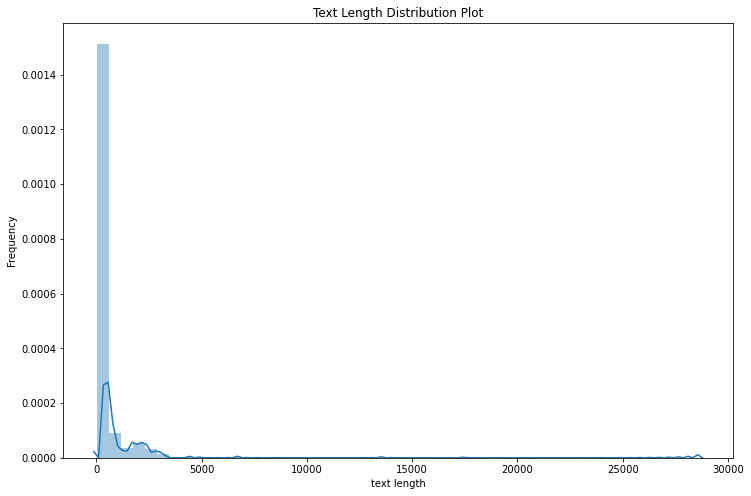

In [38]:
plt.figure(figsize=(12,8))
plt.title('Text Length Distribution Plot')
plt.ylabel('Frequency')
sns.distplot(df['text length'])

### Comment
- The majority of text are short text below 5000 however there seems to be some outliers
- It is not normally distributed and it is right skewed

In [39]:
df[df['text length']>10000]

,text,upvote_ratio,ups,score,num_comments,subreddit,text length
1118,relieving the relegation battle epl ahh the en...,0.85,52,52,17,0,17474
1151,the most prolific goal assist combination foot...,0.95,254,254,70,0,13541
1484,brazilian big series episode palmeiras previou...,0.92,148,148,18,0,28659


In [40]:
# Remove the three outliers 
df.drop([1118,1151,1484], axis=0, inplace=True)

Text(0.5, 0.98, 'Histogram on Text Length')

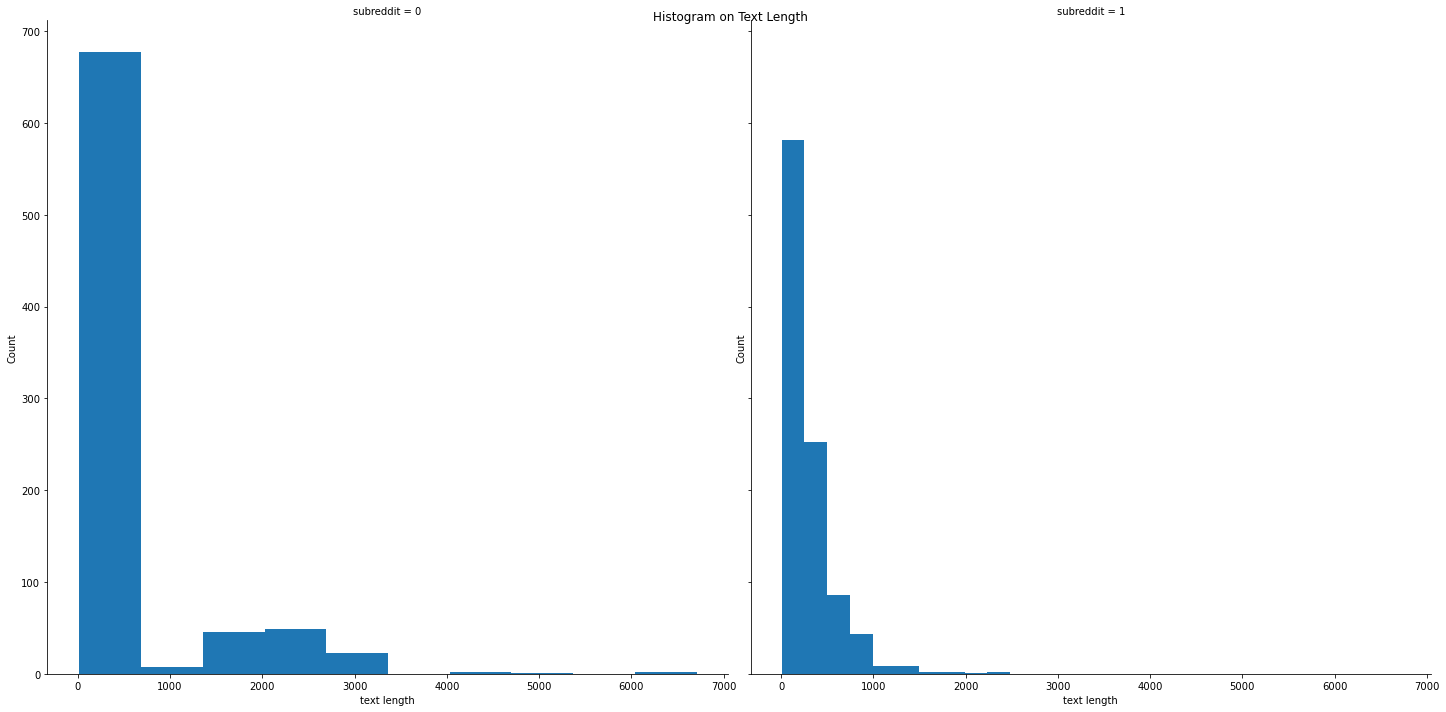

In [41]:
# Lets take a look at text length distribution, 1=Basketball, 0=Soccer
g = sns.FacetGrid(df,col='subreddit', height=10, aspect=1)
g.map(plt.hist,'text length')
g.axes[0,0].set_ylabel('Count')
g.axes[0,1].set_ylabel('Count')
g.fig.suptitle('Histogram on Text Length')

### Comment
- Looking from the scatter plot and histogram graph, soccer text length are generally longer than basketball
- There is weak correlation between text length and ups. Shorter text tends to get more ups. 
- To address the issue of outliers, the three outliers will be removed
- The distribution of text length seems to be right skewed according to the distribution plot above

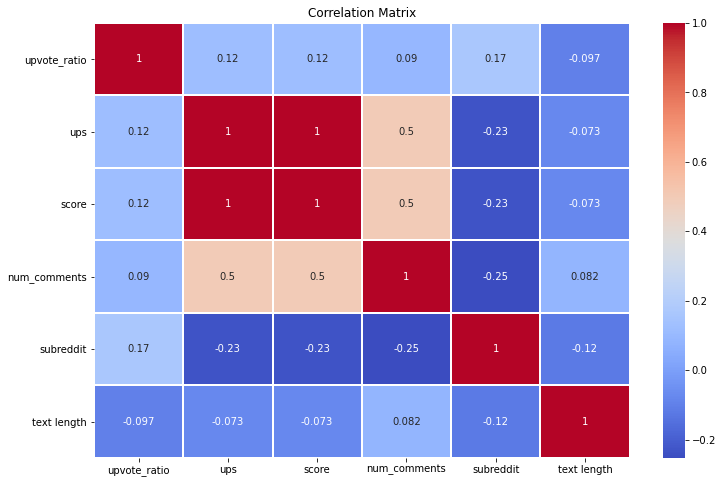

In [42]:
plt.figure(figsize=(12,8))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

### Comment
- Seems like there is no meaningful correlation between variables
- There seems to be moderate correlation between ups and number of comments(0.5), score and number of comments(0.5).
- The perfect correlation between ups and score is because they are bascially the same thing. Ups is the number of viewers find the post useful, score is the difference between ups and downs(not useful). 

Text(0.5, 1.0, 'Score vs Number of Comments')

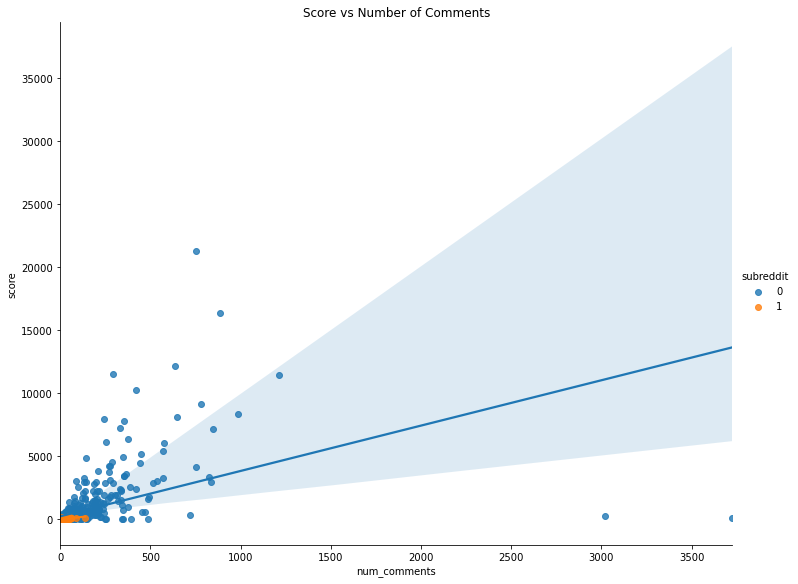

In [43]:
sns.lmplot(x='num_comments',y='score',data=df, hue='subreddit', height= 8, aspect=1.3)
ax = plt.gca()
ax.set_title("Score vs Number of Comments")

### Comment
- There seem to be a moderate relationship between score and number of comments. Post that have high score tends to attract more comments

Text(0.5, 1.0, 'Ups vs Number of Comments')

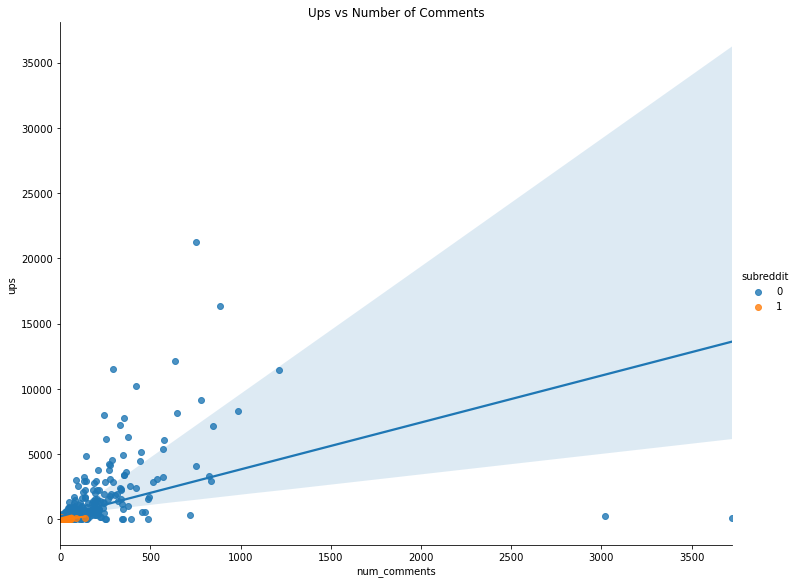

In [44]:
sns.lmplot(x='num_comments',y='ups',data=df, hue='subreddit', height= 8, aspect=1.3)
ax = plt.gca()
ax.set_title("Ups vs Number of Comments")

### Comment
- There seem to be a moderate correlation between ups and number of comments. The more ups a post get the more the comments. 
- Soccer seems to have more comments than basketball

The WordCloud is from Peekaboo.

In [45]:
# From https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

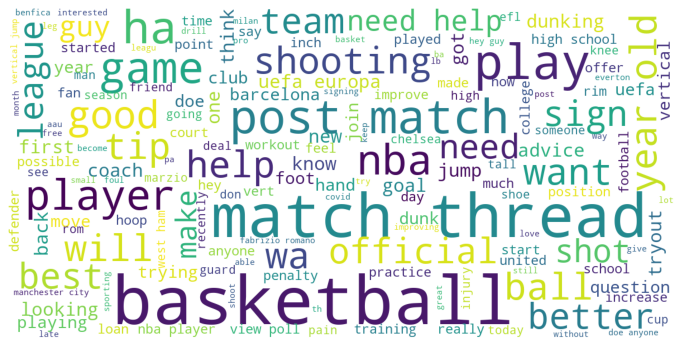

In [46]:
show_wordcloud(df['text'])

### Comment
- The popular words used are basketball, match, thread, player, help, post, league, shooting, play, nba, game etc
- Based on the above EDA, there is enough information to anwer the problem statement with the provided data. 
- During the inspection of data, summary statistics were generated, it shows there are relevant data to address the problem statement. 
- During the EDA stage, some interesting relationships between variables were identified. Also popular words were uncovered. Therefore, there is enough information at hand to address the problem statement. 

## 7. Create Feature Matrix and Target

In [47]:
X = df['text']
y = df['subreddit']

In [48]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42, 
                                                    test_size= 0.2, 
                                                    shuffle=True, 
                                                    stratify=y)

In [49]:
# Splitting the training set again
# This is to ensure there is no data leakage and to make sure, X_test and y_test remains untouched
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, 
                                                            y_train, 
                                                            random_state=42,
                                                            test_size=0.2,
                                                            shuffle=True, 
                                                            stratify=y_train)

### Baseline Score

In [50]:
y.value_counts(normalize=True)

1    0.550167
0    0.449833
Name: subreddit, dtype: float64

### Comment
- If we were to pick every post belongs to basketball, 55% of the time we will be correct. 

## 8. Model Selection

In this section, I will explore 3 models. They are Naive Bayes, logistic regression and KNN. I will run each model twice, first time using CountVertorizer and second time using Term Frequency-Inverse Document Frequency (TF-IDF). I will provide a short explaination of each model and evaluate its performance success/downfalls. 

1. Naive Bayes
    - The Naive Bayes classification algorithm is a classificiation modeling techinque which relies on Bayes Theorem. It makes one simplifying assumption that features are independent of one another. 
    - The advantages of Naive Bayes are it is easy to calculate probabilities and returns empirically accurate result.
    - The disadvantage is the assumption of feature independence is unrealistic, especially in the case of text data. The predicted probabilites can be quite bad. 

2. Logistic Regression
    - Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.
    - Logistic regression uses the logit link to bend our line of best fit. This allows us to predict between 0 and 1 for any value of inputs. 
    
#### $$\text{logit}\left(P(Y = 1)\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p$$

    - The advantage of logistic regression are the coefficients are interpretable and it shares similar properties to linear regression. 
    - The disadvantage is the assumption of linearity between the dependent variable and independent variables. Logistic Regression requires average or no mulitcollinearity between independent variables. 

3. K-Nearest-Neighbor 

    - The k-nearest neighbors algorithm (k-NN) is a non-parametric method. In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
    - The advantage of KNN is it has no training period. KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period. It does not derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc. 
    - Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm. 
    - KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)
    - The disadvantage of KNN is it does not work well with large dataset. In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.
    - The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.
    - There is also no parameters for interpretation of coefficient. 

### CountVectorize

### Naive Bayes

In [51]:
# Start our timer.
t0 = time.time()

pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('nb', MultinomialNB())
])
params = {
    'cv__stop_words': [None, 'english'],
    'cv__ngram_range': [(1, 1), (1, 2)],
    'cv__max_df': [.01, .02, .04, .03, .05],
    'cv__min_df': [2, 4, 6],
    'cv__max_features': [1000, 2000, 3000, 4000, 5000],
}
gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
gs.fit(X_train_2, y_train_2)

# Stop our timer and print the result.
print(time.time()-t0)

72.95620894432068


In [52]:
print('best score:', gs.best_score_)

best score: 0.9250692994114298


In [53]:
# Finding the best parameters 
print('best params:', gs.best_params_)

best params: {'cv__max_df': 0.03, 'cv__max_features': 5000, 'cv__min_df': 2, 'cv__ngram_range': (1, 2), 'cv__stop_words': 'english'}


In [54]:
cv = CountVectorizer(analyzer = "word",
                     stop_words='english',
                     max_df=0.03,
                     min_df=2,
                     ngram_range=(1,2),
                     max_features=5000)

In [55]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_2_cv = pd.DataFrame(cv.fit_transform(X_train_2).todense(),
                          columns = cv.get_feature_names())

In [56]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_2_cv = pd.DataFrame(cv.transform(X_test_2).todense(),
                         columns = cv.get_feature_names())

In [57]:
nb = MultinomialNB()

In [58]:
nb.fit(X_train_2_cv,y_train_2)

MultinomialNB()

In [59]:
y_pred = nb.predict(X_test_2_cv)

In [60]:
print('model accuracy on itself:', nb.score(X_train_2_cv, y_train_2))
print('model accuracy on test set:', nb.score(X_test_2_cv, y_test_2))

model accuracy on itself: 0.9712543554006968
model accuracy on test set: 0.9547038327526133


In [61]:
print(confusion_matrix(y_test_2, y_pred))
print('\n')
print(classification_report(y_test_2, y_pred))

[[117  12]
 [  1 157]]


              precision    recall  f1-score   support

           0       0.99      0.91      0.95       129
           1       0.93      0.99      0.96       158

    accuracy                           0.95       287
   macro avg       0.96      0.95      0.95       287
weighted avg       0.96      0.95      0.95       287



### Comment

- The model has a high mean accuracy score (0.9712543554006968 for training data) and (0.9547038327526133 for validation data)
- There seems to be overfitting as as the mean accuracy score for training is higher than mean accuracy for validation data
- The model also has a high recall (i.e the percent of positive cases I catch) of 0.99 for basketball. 
- It also has a high precision (i.e the percent of my predictions were correct) score of 0.93 for basketball.   

### Logistic Regression

In [62]:
# Start our timer.
t0 = time.time()

pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression())
])
params = {
    'cv__stop_words': [None, 'english'],
    'cv__ngram_range': [(1, 1), (1, 2)],
    'cv__max_df': [.8, .85, .9],
    'cv__min_df': [2, 4, 6],
    'cv__max_features': [1000, 2000, 3000, 4000, 5000],
    'lr__C': [1, .05],
    'lr__penalty':['l1','l2']
}
gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
gs.fit(X_train_2, y_train_2)

# Stop our timer and print the result.
print(time.time()-t0)

162.28403997421265


In [63]:
print('best score:', gs.best_score_)

best score: 0.9390165179419026


In [64]:
# Getting the beat parameters 
print('best params:', gs.best_params_)

best params: {'cv__max_df': 0.8, 'cv__max_features': 2000, 'cv__min_df': 2, 'cv__ngram_range': (1, 2), 'cv__stop_words': None, 'lr__C': 1, 'lr__penalty': 'l2'}


In [65]:
cv = CountVectorizer(analyzer = "word",
                     stop_words=None,
                     max_df=0.8,
                     min_df=2,
                     ngram_range=(1,2),
                     max_features=2000)

In [66]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_2_cv = pd.DataFrame(cv.fit_transform(X_train_2).todense(),
                          columns = cv.get_feature_names())

In [67]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_2_cv = pd.DataFrame(cv.transform(X_test_2).todense(),
                         columns = cv.get_feature_names())

In [68]:
lr = LogisticRegression(penalty='l2', C=1)

In [69]:
lr.fit(X_train_2_cv,y_train_2)

LogisticRegression(C=1)

In [70]:
y_pred = lr.predict(X_test_2_cv)

In [71]:
cross_val_score(lr, X_train_2_cv, y_train_2, cv=5).mean()

0.9390203151699259

In [72]:
print('mean accuracy on itself:', lr.score(X_train_2_cv, y_train_2))
print('mean accuracy on test set:', lr.score(X_test_2_cv, y_test_2))

mean accuracy on itself: 0.9878048780487805
mean accuracy on test set: 0.9477351916376306


In [73]:
print(confusion_matrix(y_test_2, y_pred))
print('\n')
print(classification_report(y_test_2, y_pred))

[[126   3]
 [ 12 146]]


              precision    recall  f1-score   support

           0       0.91      0.98      0.94       129
           1       0.98      0.92      0.95       158

    accuracy                           0.95       287
   macro avg       0.95      0.95      0.95       287
weighted avg       0.95      0.95      0.95       287



In [74]:
lr_coef_value = pd.DataFrame(data=lr.coef_.T, index=cv.get_feature_names())
lr_coef_value.columns = ['coef']
lr_coef_value['exp_coef'] = np.exp(lr_coef_value['coef'])
lr_coef_value.sort_values(by='exp_coef', ascending=False).head(10)

,coef,exp_coef
nba,1.962449,7.116731
basketball,1.725815,5.617098
what,1.534106,4.637177
anyone,1.454623,4.282869
how,1.345290,3.839300
wnba,1.042556,2.836459
guy,0.941198,2.563049
ball,0.911828,2.488868
game,0.890991,2.437545
when,0.849210,2.337799


In [75]:
lr_coef_value.sort_values(by='exp_coef').head(10)

,coef,exp_coef
club,-1.152635,0.315804
football,-1.071958,0.342337
sign,-1.066916,0.344068
penalty,-1.021343,0.360111
match,-1.019929,0.360620
goal,-1.008941,0.364605
bayern,-0.992634,0.370599
chelsea,-0.980248,0.375218
will,-0.920893,0.398163
official,-0.827364,0.437200


### Comment

- The model has a high mean accuracy score (0.9878048780487805 for training data) and (0.9477351916376306 for validation data)
- There seems to be overfitting as as the mean accuracy score for training is higher than mean accuracy for validation data
- The model also has a high recall (i.e the percent of positive cases I catch) of 0.92 for basketball.
- It also has a high precision (i.e the percent of my predictions were correct) score of 0.98 for basketball. 
- The presence of the word "nba" increases by 1, the post is about 7.12 times as likely to be a basketball post.
- On the other hand, the presence of words such as "club", "football", "penalty", "goal" indicates that the post is most likely be a soccer post instead of basketball post. 

### KNN (Baseline Model, I will compare all models against this model)

In [76]:
# Start our timer.
t0 = time.time()

pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])
params = {
    'cv__stop_words': [None, 'english'],
    'cv__ngram_range': [(1, 1), (1, 2)],
    'cv__max_df': [.5, .6, .7, .8],
    'cv__min_df': [2, 4, 6],
    'cv__max_features': [1000, 2000, 3000, 4000, 5000],
    'knn__n_neighbors': [10, 25],
    'knn__weights':['uniform','distance']
    
}
gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
gs.fit(X_train_2, y_train_2)

# Stop our timer and print the result.
print(time.time()-t0)

238.24736785888672


In [77]:
print('best score:', gs.best_score_)

best score: 0.8083576988798177


In [78]:
print('best params:', gs.best_params_)

best params: {'cv__max_df': 0.5, 'cv__max_features': 3000, 'cv__min_df': 2, 'cv__ngram_range': (1, 1), 'cv__stop_words': 'english', 'knn__n_neighbors': 25, 'knn__weights': 'distance'}


In [79]:
cv = CountVectorizer(analyzer = "word",
                     stop_words= 'english',
                     max_df=0.5,
                     min_df=2,
                     ngram_range=(1,1),
                     max_features=3000)

In [80]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_2_cv = pd.DataFrame(cv.fit_transform(X_train_2).todense(),
                          columns = cv.get_feature_names())

In [81]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_2_cv = pd.DataFrame(cv.transform(X_test_2).todense(),
                         columns = cv.get_feature_names())

In [82]:
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')

In [83]:
knn.fit(X_train_2_cv,y_train_2)

KNeighborsClassifier(n_neighbors=25, weights='distance')

In [84]:
y_pred = knn.predict(X_test_2_cv)

In [85]:
cross_val_score(knn, X_train_2_cv, y_train_2, cv=5).mean()

0.7883045376874881

In [86]:
print('model accuracy on itself:', knn.score(X_train_2_cv, y_train_2))
print('model accuracy on test set:', knn.score(X_test_2_cv, y_test_2))

model accuracy on itself: 0.9991289198606271
model accuracy on test set: 0.8362369337979094


In [87]:
print(confusion_matrix(y_test_2, y_pred))
print('\n')
print(classification_report(y_test_2, y_pred))

[[ 97  32]
 [ 15 143]]


              precision    recall  f1-score   support

           0       0.87      0.75      0.80       129
           1       0.82      0.91      0.86       158

    accuracy                           0.84       287
   macro avg       0.84      0.83      0.83       287
weighted avg       0.84      0.84      0.83       287



### Comment

- The model has a high mean accuracy score (0.9991289198606271 for training data) and (0.8362369337979094 for validation data)
- This is a case of severe overfitting as as the mean accuracy score for training is way higher than mean accuracy for validation data. 
- The model has recall (i.e the percent of positive cases I catch) of 0.91 for basketball.   
- It has a precision (i.e the percent of my predictions were correct) score of 0.82 for basketball, lower than other models. 

###  Term Frequency-Inverse Document Frequency (TF-IDF)

### Naive Bayes

In [88]:
# Start our timer.
t0 = time.time()

pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])
params = {
    'tfidf__stop_words': [None, 'english'],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_df': [.03, .05, .1, .2],
    'tfidf__min_df': [2, 4, 6],
    'tfidf__max_features': [1000, 2000, 3000, 4000, 5000],
}
gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
gs.fit(X_train_2, y_train_2)

# Stop our timer and print the result.
print(time.time()-t0)

60.75440692901611


In [89]:
print('best score:', gs.best_score_)

best score: 0.9459654452249857


In [90]:
print('best params:', gs.best_params_)

best params: {'tfidf__max_df': 0.1, 'tfidf__max_features': 5000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': 'english'}


In [91]:
tfidf = TfidfVectorizer(analyzer = "word",
                     stop_words='english',
                     max_df=0.1,
                     min_df=2,
                     ngram_range=(1,2),
                     max_features=5000)

In [92]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_2_tfidf = pd.DataFrame(tfidf.fit_transform(X_train_2).todense(),
                          columns = tfidf.get_feature_names())

In [93]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_2_tfidf = pd.DataFrame(tfidf.transform(X_test_2).todense(),
                         columns = tfidf.get_feature_names())

In [94]:
nb = MultinomialNB()

In [95]:
nb.fit(X_train_2_tfidf,y_train_2)

MultinomialNB()

In [96]:
y_pred = nb.predict(X_test_2_tfidf)

In [97]:
cross_val_score(nb, X_train_2_tfidf, y_train_2, cv=5).mean()

0.947708372887792

In [98]:
print('model accuracy on itself:', nb.score(X_train_2_tfidf, y_train_2))
print('model accuracy on test set:', nb.score(X_test_2_tfidf, y_test_2))

model accuracy on itself: 0.9782229965156795
model accuracy on test set: 0.9651567944250871


In [99]:
print(confusion_matrix(y_test_2, y_pred))

[[120   9]
 [  1 157]]


In [100]:
print(classification_report(y_test_2, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       129
           1       0.95      0.99      0.97       158

    accuracy                           0.97       287
   macro avg       0.97      0.96      0.96       287
weighted avg       0.97      0.97      0.97       287



### Comment

- The model has a high mean accuracy score (0.9782229965156795 for training data) and (0.9651567944250871 for validation data)
- There seems to be overfitting as as the mean accuracy score for training is higher than mean accuracy for validation data
- The model also has a high recall (i.e the percent of positive cases I catch) of 0.99 for basketball. 
- It also has a high precision (i.e the percent of my predictions were correct) score of 0.95 for basketball.  

### Logistic Regression

In [101]:
# Start our timer.
t0 = time.time()

pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression())
])
params = {
    'tfidf__stop_words': [None, 'english'],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_df': [.07, .08, .85, .95, 1],
    'tfidf__min_df': [2, 4, 6],
    'tfidf__max_features': [1000, 2000, 3000, 4000, 5000],
    'lr__C': [1, .05],
    'lr__penalty':['l1','l2']
}
gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
gs.fit(X_train_2, y_train_2)

# Stop our timer and print the result.
print(time.time()-t0)

285.4238169193268


In [102]:
print('best score:', gs.best_score_)

best score: 0.9538408961458135


In [103]:
print('best params:', gs.best_params_)

best params: {'lr__C': 1, 'lr__penalty': 'l2', 'tfidf__max_df': 0.85, 'tfidf__max_features': 5000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': 'english'}


In [104]:
tfidf = TfidfVectorizer(analyzer = "word",
                     stop_words='english',
                     max_df=0.85,
                     min_df=2,
                     ngram_range=(1,2),
                     max_features=5000)

In [105]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_2_tfidf = pd.DataFrame(tfidf.fit_transform(X_train_2).todense(),
                          columns = tfidf.get_feature_names())

In [106]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_2_tfidf = pd.DataFrame(tfidf.transform(X_test_2).todense(),
                         columns = tfidf.get_feature_names())

In [107]:
lr = LogisticRegression(penalty='l2', C=1)

In [108]:
lr.fit(X_train_2_tfidf,y_train_2)

LogisticRegression(C=1)

In [109]:
y_pred = lr.predict(X_test_2_tfidf)

In [110]:
cross_val_score(lr, X_train_2_tfidf, y_train_2, cv=5).mean()

0.9547028669071578

In [111]:
print('mean accuracy on itself:', lr.score(X_train_2_tfidf, y_train_2))
print('mean accuracy on test set:', lr.score(X_test_2_tfidf, y_test_2))

mean accuracy on itself: 0.9939024390243902
mean accuracy on test set: 0.9616724738675958


In [112]:
print(confusion_matrix(y_test_2, y_pred))
print('\n')
print(classification_report(y_test_2, y_pred))

[[123   6]
 [  5 153]]


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       129
           1       0.96      0.97      0.97       158

    accuracy                           0.96       287
   macro avg       0.96      0.96      0.96       287
weighted avg       0.96      0.96      0.96       287



In [113]:
lr_coef_value = pd.DataFrame(data=lr.coef_.T, index=tfidf.get_feature_names())
lr_coef_value.columns = ['coef']
lr_coef_value['exp_coef'] = np.exp(lr_coef_value['coef'])
lr_coef_value.sort_values(by='exp_coef', ascending=False).head(10)

,coef,exp_coef
basketball,3.434121,31.004145
nba,2.504287,12.234827
just,1.953341,7.052211
like,1.888300,6.608128
good,1.811921,6.122199
game,1.770369,5.873018
ball,1.634172,5.125214
know,1.582610,4.867646
doe,1.532010,4.627467
tip,1.488273,4.429437


In [114]:
lr_coef_value.sort_values(by='exp_coef').head(10)

,coef,exp_coef
icon,-2.206740,0.110059
club,-1.579625,0.206052
chelsea,-1.467269,0.230554
sign,-1.457745,0.232761
goal,-1.447352,0.235192
penalty,-1.379323,0.251749
official,-1.357895,0.257202
loan,-1.329355,0.264648
match,-1.182461,0.306523
bayern,-1.130146,0.322986


### Comment

- The model has a high mean accuracy score (0.9939024390243902 for training data) and (0.9616724738675958 for validation data)
- There seems to be overfitting as as the mean accuracy score for training is higher than mean accuracy for validation data
- The model also has a high recall (i.e the percent of positive cases I catch) of 0.97 for basketball.
- It also has a high precision (i.e the percent of my predictions were correct) score of 0.96 for basketball. 
- The presence of the word "basketball" increases by 1, the post is about 31 times as likely to be a basketball post.
- On the other hand, the presence of words such as "club", "chelsea", "penalty", "goal", 'bayern" indicates that the post is most likely be a soccer post instead of basketball post. 

### KNN

In [115]:
# Start our timer.
t0 = time.time()

pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])
params = {
    'tfidf__stop_words': [None, 'english'],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_df': [.85, .9, .95],
    'tfidf__min_df': [2, 4, 6],
    'tfidf__max_features': [1000, 2000, 3000, 4000, 5000],
    'knn__n_neighbors': [2, 5, 10, 25],
    'knn__weights':['uniform','distance']
    
}
gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
gs.fit(X_train_2, y_train_2)

# Stop our timer and print the result.
print(time.time()-t0)

412.49567890167236


In [116]:
print('best score:', gs.best_score_)

best score: 0.9433871273970003


In [117]:
print('best params:', gs.best_params_)

best params: {'knn__n_neighbors': 10, 'knn__weights': 'distance', 'tfidf__max_df': 0.85, 'tfidf__max_features': 5000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}


In [118]:
tfidf = TfidfVectorizer(analyzer = "word",
                     stop_words=None,
                     max_df=0.85,
                     min_df=2,
                     ngram_range=(1,2),
                     max_features=5000)

In [119]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_2_tfidf = pd.DataFrame(tfidf.fit_transform(X_train_2).todense(),
                          columns = tfidf.get_feature_names())

In [120]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_2_tfidf = pd.DataFrame(tfidf.transform(X_test_2).todense(),
                         columns = tfidf.get_feature_names())

In [121]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')

In [122]:
knn.fit(X_train_2_tfidf,y_train_2)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [123]:
y_pred = knn.predict(X_test_2_tfidf)

In [124]:
cross_val_score(knn, X_train_2_tfidf, y_train_2, cv=5).mean()

0.9459920258211506

In [125]:
print('model accuracy on itself:', knn.score(X_train_2_tfidf, y_train_2))
print('model accuracy on test set:', knn.score(X_test_2_tfidf, y_test_2))

model accuracy on itself: 0.9991289198606271
model accuracy on test set: 0.9686411149825784


In [126]:
print(confusion_matrix(y_test_2, y_pred))
print('\n')
print(classification_report(y_test_2, y_pred))

[[125   4]
 [  5 153]]


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       129
           1       0.97      0.97      0.97       158

    accuracy                           0.97       287
   macro avg       0.97      0.97      0.97       287
weighted avg       0.97      0.97      0.97       287



### Comment

- The model has a high mean accuracy score (0.9991289198606271 for training data) and (0.9686411149825784 for validation data)
- There seems to be overfitting as as the mean accuracy score for training is higher (perfect) than mean accuracy for validation data. 
- The model has recall (i.e the percent of positive cases I catch) of 0.97 for basketball which is rather low compare to other models. 
- It has a high precision (i.e the percent of my predictions were correct) score of 0.97 for basketball. 

## 9. Selected Model and Business Recommendations

### Selected Model =  Logistic Regression TF-IDF

In [127]:
tfidf = TfidfVectorizer(analyzer = "word",
                     stop_words='english',
                     max_df=0.85,
                     min_df=2,
                     ngram_range=(1,2),
                     max_features=5000)

In [128]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_tfidf = pd.DataFrame(tfidf.fit_transform(X_train).todense(),
                          columns = tfidf.get_feature_names())

In [129]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_tfidf = pd.DataFrame(tfidf.transform(X_test).todense(),
                         columns = tfidf.get_feature_names())

In [130]:
lr = LogisticRegression(penalty='l2', C=1)

In [131]:
lr.fit(X_train_tfidf,y_train)

LogisticRegression(C=1)

In [132]:
y_pred = lr.predict(X_test_tfidf)

In [133]:
cross_val_score(lr, X_train_tfidf, y_train, cv=5).mean()

0.9581881533101045

In [134]:
print('mean accuracy on itself:', lr.score(X_train_tfidf, y_train))
print('mean accuracy on test set:', lr.score(X_test_tfidf, y_test))

mean accuracy on itself: 0.9895470383275261
mean accuracy on test set: 0.9498607242339833


In [135]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[150  11]
 [  7 191]]


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       161
           1       0.95      0.96      0.96       198

    accuracy                           0.95       359
   macro avg       0.95      0.95      0.95       359
weighted avg       0.95      0.95      0.95       359



In [136]:
lr_coef_value = pd.DataFrame(data=lr.coef_.T, index=tfidf.get_feature_names())
lr_coef_value.columns = ['coef']
lr_coef_value['exp_coef'] = np.exp(lr_coef_value['coef'])
lr_coef_value.sort_values(by='exp_coef', ascending=False).head(10)

,coef,exp_coef
basketball,3.805025,44.926382
nba,2.842973,17.166732
game,2.042460,7.709549
just,1.999082,7.382278
good,1.931700,6.901233
like,1.864540,6.452969
know,1.842560,6.312680
ball,1.801133,6.056509
tip,1.727179,5.624764
shot,1.615363,5.029715


In [137]:
lr_coef_value.sort_values(by='exp_coef').head(10)

,coef,exp_coef
icon,-2.307410,0.099519
club,-1.738436,0.175795
goal,-1.587384,0.204460
sign,-1.485854,0.226309
official,-1.456467,0.233058
penalty,-1.455049,0.233389
chelsea,-1.447114,0.235248
loan,-1.370586,0.253958
football,-1.355838,0.257731
match,-1.319981,0.267140


### Justification for picking Logistic Regression TF-IDF & Interpretation of Model

1. TF-IDF penalize common words and give rare words more influence. This is relevant to our problem statement, basketball posts and soccer posts tends to use different terms. For example, basketball post might commonly use the word "NBA" because that is the most popular basketball association. On the other hand, soccer post might commonly find the word "EPL" or "Premier League" because that is a popular football league. Therefore, penalize common words and giving more influence to rare words would help us in our classification problem. 

2. Comparing the model scores of CountVectorizer and TfidfVectorizer, in all instances models under TfidfVectorizer scores better. 

3. Why Logistic Regression? Logistic Regression gives a high mean accuracy score for both training data (0.9895470383275261) and test data (0.9498607242339833). This means that the model generalises well and scores well on unseen data. It returns one of the highest test score amongst all models. It also scores much better than the baseline score.  

4. The model also has a high recall (i.e the percent of positive cases I catch) of 0.96 for basketball. It also has a high precision (i.e the percent of my predictions were correct) score of 0.95 for basketball. 
 
5. Logistic Regression allows me to interpret model coefficients as indicators of feature importance. 
    - For example, the presence of the word "basketball" increases by 1, the post is about 44 times as likely to be a basketball post. You might think that the presence of the word "basketball" in basketball post are very common. However, based on domin knowledge, it can also be interpreted as basketball fans likes to stay true to the game and not involve the sport in politics. For example, NBA icon Charles Barkley ones mentioned, fans dont like to see politics in the sport. (https://www.bet.com/news/sports/2020/07/14/charles-barkley-nba-social-justice.html)  
    - Similarly, the presence of the word "nba" increases by 1, the post is about 17.2 times as likely to be a basketball post. Based on domin knowledge, NBA is the most popular basketball league in the world. It has many famous basketball icons such as Michael Jordan and Kobe Bryant who have huge fan base all over the world. It is therefore logical for the word 'nba' to be ranked as the top few most impactful words. 
    - Based on reading the posts in reddit, basketball fans are also very interested in finding out how to improve their basketball skills. For example, there were many post that ask for tips to improve jumping abiltiy, shooting accuracy and game tactics. It is therefore, logical for words such as 'game', 'good', 'know', 'tip' and 'shoot' to be among the significant words. 
    - On the other hand, the presence of words such as "club", "goal", "penalty", "chelsea", 'loan" indicates that the post is most likely a soccer post instead of basketball post. 
    - The interpretation of coefficients allows us to make useful recommendations for our problem statement.  

6. Logistic Regression also has some limiations, for instance it assumes independence of independent Variables and the independent variables X1, . . . , Xm are linearly related to the logit of the probability. These are assumations however it may not always be the case. Nonetheless, for our problem statement, logistic regression is an useful model. 

### Conclusion and Recommendations

- Search Engine Optimisation (SEO)
    - Based on our research through reddit post and our logistic model, keys words such as Basketball, NBA, Game, Good, Like, Know, Ball, Tip and Shoot are the words that best indicate a basketball post. This means that, basetball fans likes to use such words and would engage in discussions around such topics. Therefore, FIBA can include these words during their web improvement process to boost online presence. 
- Keep the Marketing Message Short and Sweet
    - Based on our research, basketball posts are generally shorter than football posts. This means that, basketball fans prefer short and concise text. Research result also shows that shorter texts tends to get more up votes compared to longer post. Social media platforms would be a good channel for FIBA's markeing effort. For example Twitter. Twitter only allows 140 texts per post, therefore its message is short and concise. Basketball fans might like such style.
- Marketing Message Needs to be Meaningful
    - Research result shows that the number of comments has a moderate positive correlation with posts score and support votes(ups). This means that, basketball fans appreciates meaningful content and they are more willing to participate in discussions that interests them. Besides that, our result indicated that the number of comments in basketball posts are generally fewer than soccer posts. This means that the current basketball posts are not engaging and there are few fans participating in discussion. 
    - FIBA can use the key words identified in our model to create meaningful discussion topics. For example, a discussion on NBA players playing style. Besides that, research findings also indicate that basketball fans are also interested in improving their own game. From the word cloud and logistic model, words such as know, tip, help, better and shoot kept coming up. This means that, basketball fans are seeking information that can help them improve their game. Therefore, FIBA's marketing campaign can include educational aspect in it. The presence of relevant key words would attract the attention of basketball fans and therefore trigger active discussion.
- Avoid Aggressive Marketing Campaign
    - The strategy of aggressive marketing should be avoided. Aggressive marketing is kind of marketing campaign where one brand will expose the weakness of its rival brand. For example, Coca Cola attacking pepsi or Mercedes attacking BMW in their advertisement. FIBA's marketing campaign should only focus on Basketball and not involve other elements. Basketball fans likes to stay true to the game therefore the marketing campaign needs to be pure.   
    
Citations:
1. https://esrc.ukri.org/research/impact-toolkit/social-media/twitter/what-is-twitter/#:~:text=Twitter%20allows%20you%20to%3A,other%20experts%20in%20your%20field

- This project first started by scrapping unique posts from reddit, the data was inspected and cleaned for analysis. In exploratory data analysis (EDA), we compared the general behavioural and relationships (text length, votes, scores, ups) of basketball fans and soccer fans. We have also use word cloud to identify common words. Next, models were build to make predicitions on unseen data. Logistic regression was identified as the most appropriate model, its coefficients were interpreted (i.e. impact of key words interpreted). Meaningful recommendations were given based on EDA and model. Therefore, each individual step connects to the overall project.    
- Our research had successfully answered the original problem statement, which is to discover the key words that best differentiate basketball fans from soccer fans in reddit posts. We have also use these key words to derive marketing strategies.  
- FIBA can use the recommendations above to better engage with its fans so as to reduce customer(fans) churn and to win back former fans. Otherwise, basketball fans worldwide will continue to dwindle. With a large active fan base, FIBA can more easily secure funding and sponsorship. Secondary stakeholders such as major basketball associations for example NBA and the teams in it. They would benefit in terms of ticket sales, membership sign up, pay per view and merchandise sales.

## 10. Future Steps

- In the future, a larger dataset could be gathered. Currently, only around 900 unique posts were gathered for basketball and 800 posts for soccer. A larger dataset would be better for us to make inference of the population. 
- More models could be applied, for example models such as random forest and artificial neural network could be explored in the future. These are advanced models which might provide better predicitions. 
- Future research can combine both qualitative and quantitative methods. We are basically studying human behavioural, our data science research can be supported by interviews or focus groups. This would allow us to discover more meaning behind our findings. For example, we can invite basketfall fans to discuss about the keys words identified in our model. This would help us derive meaning from the fans perspective. 
- Our model is limited to the corpus of texts obtained from scrapping soccer and basketball reddit APIs. It would be better if the model can learn on its own, constantly update new text. This would allow the model to stay relevant longer. 
- Currently, our model only analyse basketball and soccer texts. In the future, the model can be expanded to include more sports.  